# *CodexCue*
## **ALLOCATED PROJECTS 1 - Simple Linear Regression**

## Required Imports

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Dataset Analysis - EDA

In [1]:
df = pd.read_csv('linear_reg_dataset.csv')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
rows, cols = df.shape
print("Our dataset have",rows,"rows and",cols,"columns")

Our dataset have 244 rows and 7 columns


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [6]:
for column in df.columns:
    print(f"Number of null values in {column}: {df[column].isnull().sum()}")

Number of null values in total_bill: 0
Number of null values in tip: 0
Number of null values in sex: 0
Number of null values in smoker: 0
Number of null values in day: 0
Number of null values in time: 0
Number of null values in size: 0


In [12]:
if df.isnull().sum().sum() == 0:
    print("No missing values found in the dataset.")
else:
    print("Missing values found. Handling missing values...")
    df = df.dropna()

No missing values found in the dataset.


In [7]:
df.duplicated().sum()

1

In [13]:
df.drop_duplicates(keep='first', inplace=True)

In [14]:
df.duplicated().sum()

0

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [9]:
df.describe(include='object').T

,count,unique,top,freq
sex,244,2,Male,157
smoker,244,2,No,151
day,244,4,Sat,87
time,244,2,Dinner,176


In [15]:
print(df['sex'].value_counts())
print(df['smoker'].value_counts())

sex
Male      157
Female     86
Name: count, dtype: int64
smoker
No     151
Yes     92
Name: count, dtype: int64


## Handling Outliers - IQR method

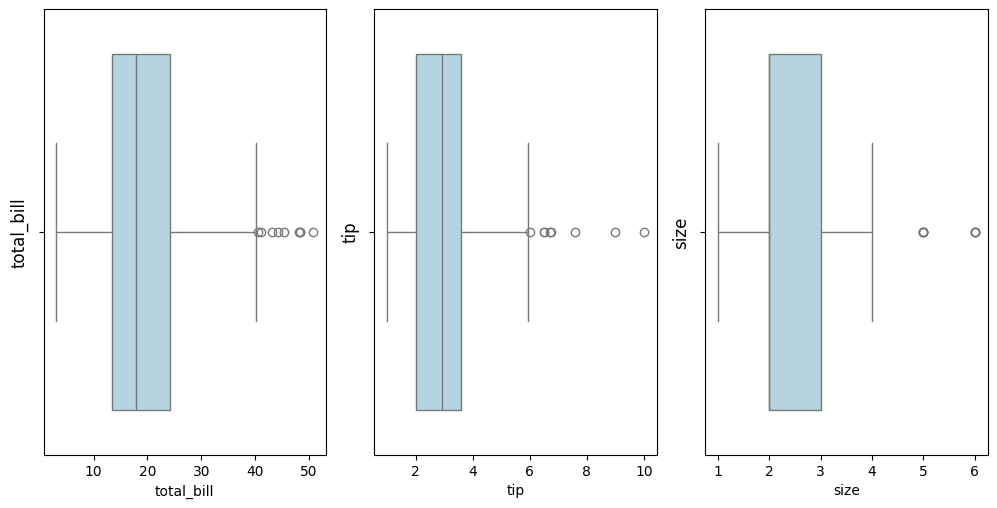

In [17]:
plt.figure(figsize=(20, 40))

num_cols = [col for col in df.columns if df[col].dtype in ['float64', 'int64']]

# Create subplots for each column
for i, column in enumerate(num_cols):
    plt.subplot(8, 6, i+1) # for subplot grid
    sns.boxplot(data=df[column], color='lightblue', orient='h')
    plt.ylabel(column, fontsize=12)
    plt.tight_layout()
plt.show()

In [18]:
print(df['total_bill'].max())
print(df['total_bill'].min())

50.81
3.07


<Axes: xlabel='total_bill'>

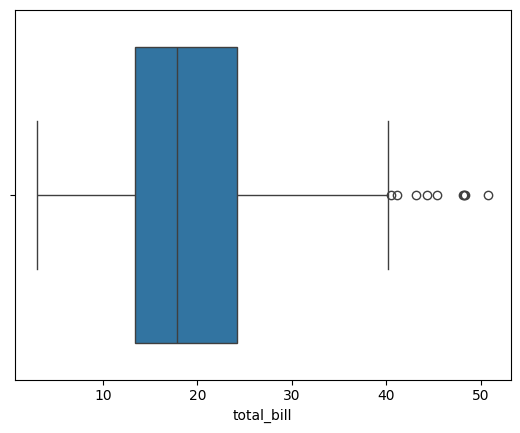

In [19]:
sns.boxplot(x=df['total_bill'])

<Axes: xlabel='total_bill'>

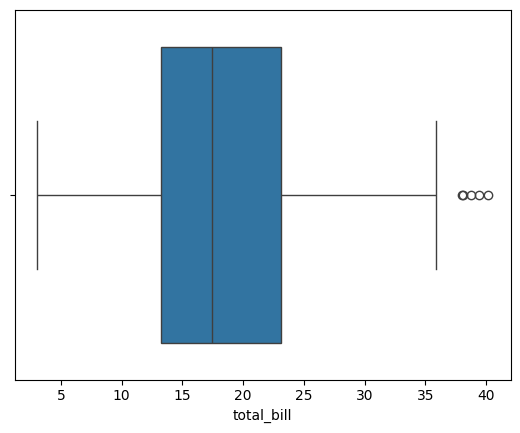

In [20]:
# calculate the IQR for the 'occurance' column
q1 = df['total_bill'].quantile(0.25)
q3 = df['total_bill'].quantile(0.75)
iqr = q3 - q1

# find the outliers using the IQR method
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df = df[(df['total_bill'] >= lower_bound) & (df['total_bill'] <= upper_bound)]


# visualize outliers using different sns plots
sns.boxplot(x=df['total_bill']) # boxplot

In [21]:
print(df['total_bill'].max())
print(df['total_bill'].min())

40.17
3.07


In [22]:
print(df['tip'].max())
print(df['tip'].min())

7.58
1.0


<Axes: xlabel='tip'>

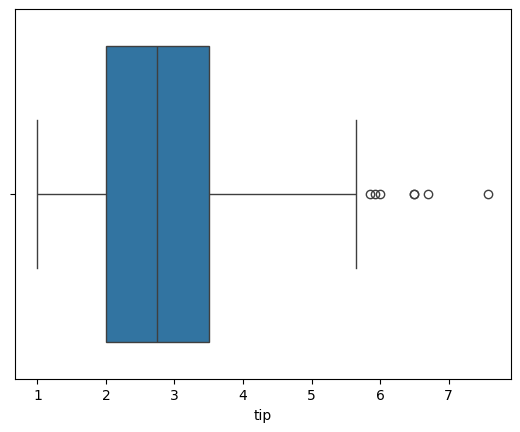

In [23]:
sns.boxplot(x=df['tip'])

<Axes: xlabel='tip'>

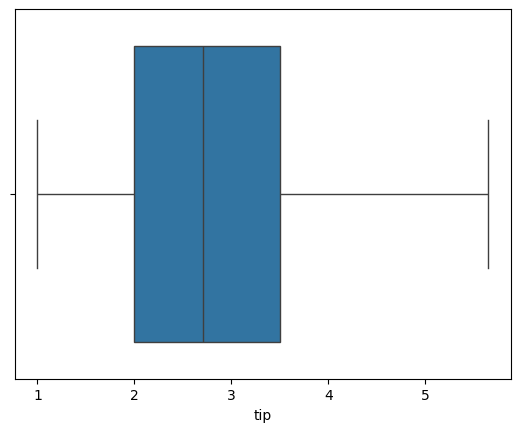

In [24]:
# calculate the IQR for the 'occurance' column
q1 = df['tip'].quantile(0.25)
q3 = df['tip'].quantile(0.75)
iqr = q3 - q1

# find the outliers using the IQR method
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df = df[(df['tip'] >= lower_bound) & (df['tip'] <= upper_bound)]


# visualize outliers using different sns plots
sns.boxplot(x=df['tip']) # boxplot

In [25]:
print(df['tip'].max())
print(df['tip'].min())

5.65
1.0


In [26]:
print(df['size'].max())
print(df['size'].min())

6
1


<Axes: xlabel='size'>

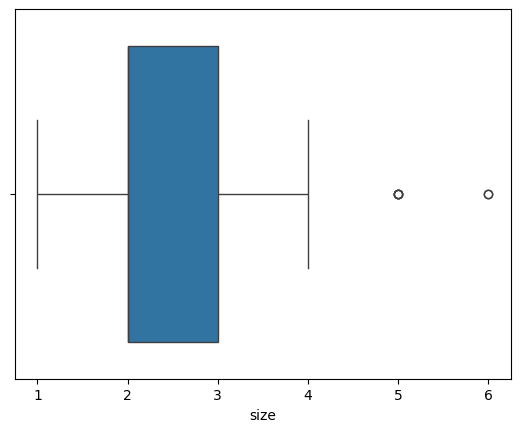

In [27]:
sns.boxplot(x=df['size'])

<Axes: xlabel='size'>

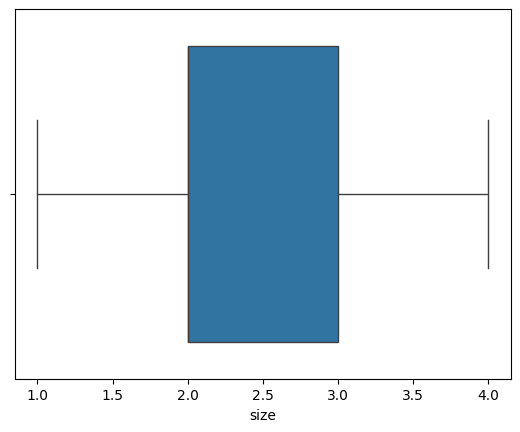

In [28]:
# calculate the IQR for the 'occurance' column
q1 = df['size'].quantile(0.25)
q3 = df['size'].quantile(0.75)
iqr = q3 - q1

# find the outliers using the IQR method
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df = df[(df['size'] >= lower_bound) & (df['size'] <= upper_bound)]


# visualize outliers using different sns plots
sns.boxplot(x=df['size']) # boxplot

In [29]:
print(df['size'].max())
print(df['size'].min())

4
1


## Data Visualization

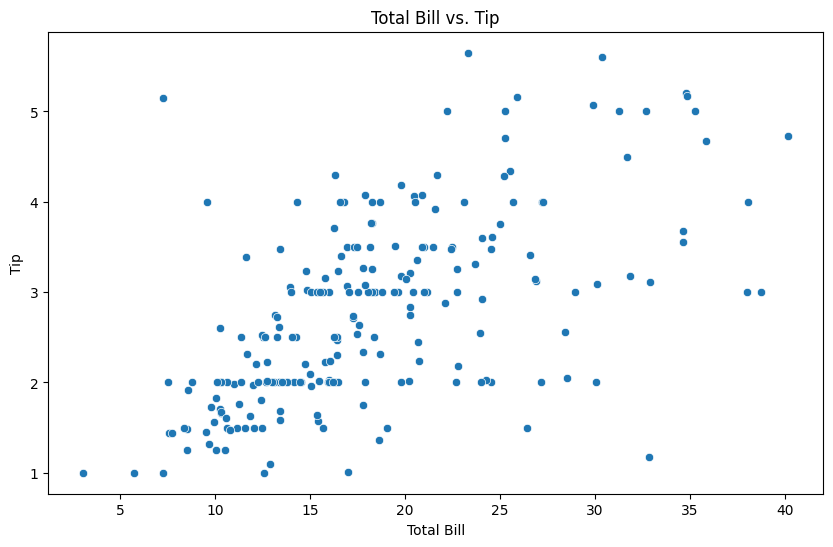

In [31]:
# Scatter plot for total_bill vs. tip
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_bill', y='tip', data=df)
plt.title('Total Bill vs. Tip')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.show()

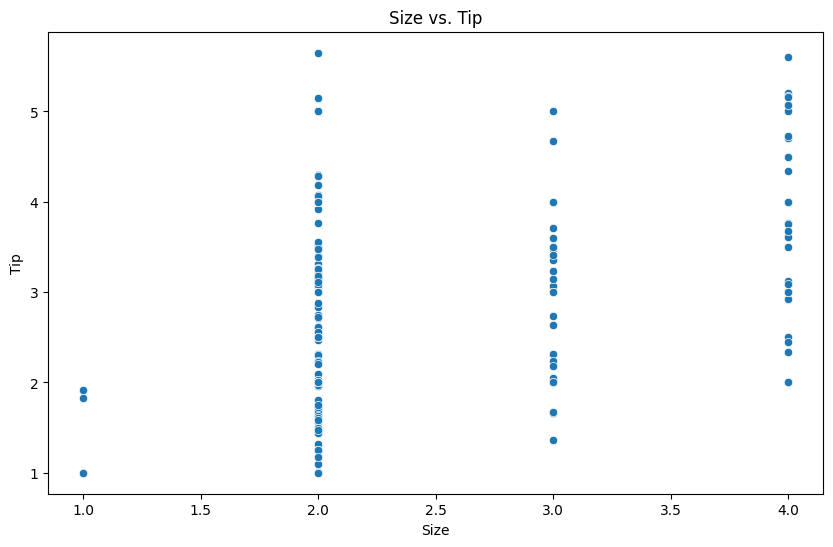

In [32]:
# Scatter plot for size vs. tip
plt.figure(figsize=(10, 6))
sns.scatterplot(x='size', y='tip', data=df)
plt.title('Size vs. Tip')
plt.xlabel('Size')
plt.ylabel('Tip')
plt.show()

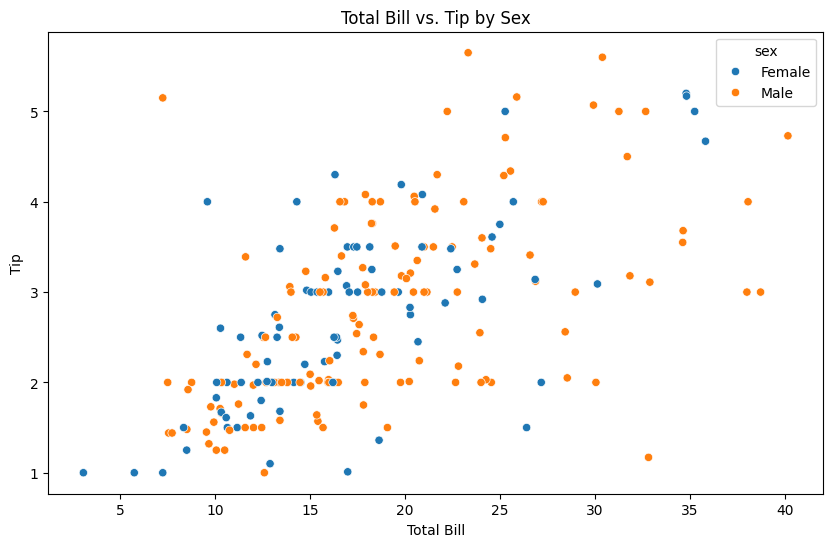

In [33]:
# Scatter plot for total_bill vs. tip colored by sex
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_bill', y='tip', hue='sex', data=df)
plt.title('Total Bill vs. Tip by Sex')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.show()

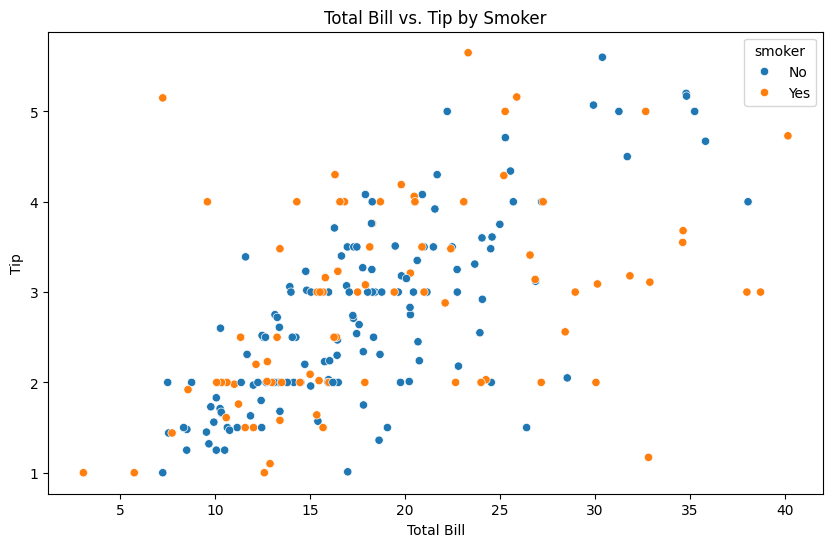

In [34]:
# Scatter plot for total_bill vs. tip colored by smoker
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_bill', y='tip', hue='smoker', data=df)
plt.title('Total Bill vs. Tip by Smoker')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.show()


<ipython-input-43-81ed264ec7f1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.countplot(x='time', data=df, palette= 'Dark2')


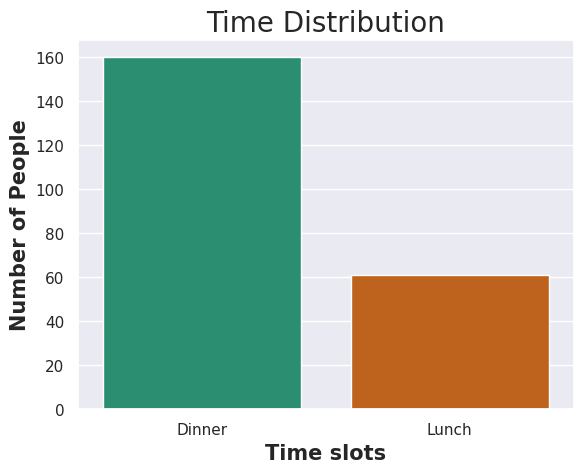

In [43]:
# plotting the count plot
sns.set(style='darkgrid')
plot = sns.countplot(x='time', data=df, palette= 'Dark2')
plt.title('Time Distribution', size= 20)
plt.xlabel('Time slots', weight='bold', size = 15)
plt.ylabel('Number of People', weight='bold', size = 15)
plt.show()

Text(0.5, 1.0, 'size')

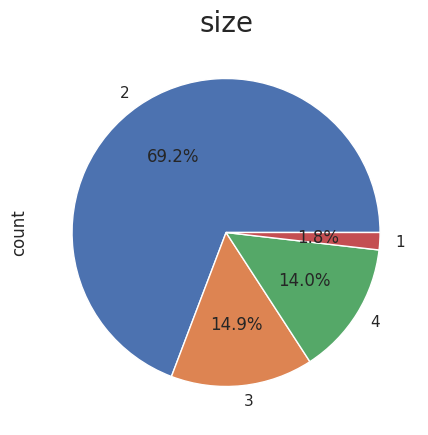

In [44]:
plt.figure(figsize=(5,5))
df['size'].value_counts().plot(kind = "pie" ,autopct='%1.1f%%')
plt.title('size',size=20)

## Splitting the dataset into training and testing sets

In [37]:
X = df[['total_bill']]  # Independent variable
y = df['tip']  # Dependent variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


## Model Building

In [38]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [39]:
y_pred = model.predict(X_test)

## Model Evaluation

In [40]:
# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")

Mean Squared Error (MSE): 0.61


In [41]:
# R-squared (R2)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2): {r2:.2f}")

R-squared (R2): 0.45


## Visualizing the Model Predictions and Actual values

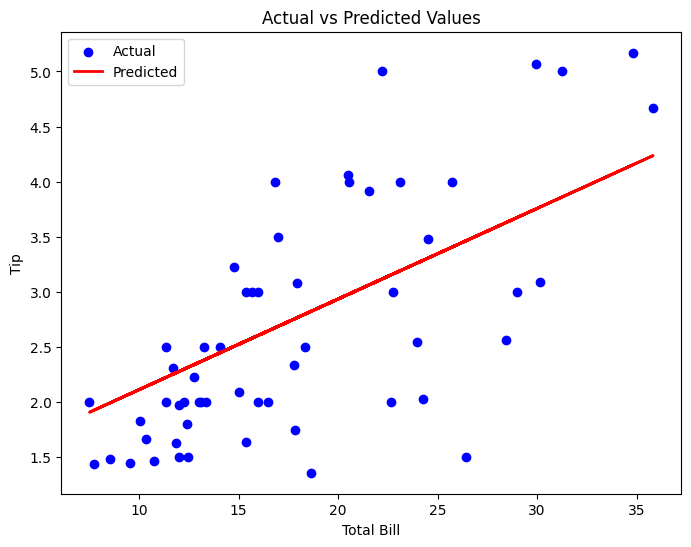

In [42]:
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()
